In [172]:
import pandas as pd

In [173]:
import numpy as np

In [174]:
import matplotlib.pyplot as plt

In [175]:
import seaborn as sns

In [176]:
import pandas_profiling
import math as m

In [177]:
play_no = 5/14
play_yes = 9/14

In [178]:
entropy_play = -play_no*m.log(play_no,2) - play_yes*m.log(play_yes,2)
print("entropy of play",entropy_play)

entropy of play 0.9402859586706309


In [179]:
windy_strong = 6/14
windy_weak = 8/14

In [180]:
entropy_windy = -windy_weak*m.log(windy_weak,2) - windy_strong*m.log(windy_strong,2)
print("entropy of windy",entropy_windy)

entropy of windy 0.9852281360342516


In [181]:
humidity_high = 7/14
humidity_normal = 7/14

In [182]:
entropy_humidity = -humidity_normal*m.log(humidity_normal,2) - humidity_high*m.log(humidity_high,2)
print("entropy of humidity",entropy_humidity)

entropy of humidity 1.0


In [183]:
outlook_rainy = 5/14
outlook_overcast = 4/14
outlook_sunny = 5/14

In [184]:
e_s = -3/5 * m.log(3/5,2) - 2/9*m.log(2/9,2)
#e_o = -0/5 * m.log(0/5,2)- 4/5*m.log(4/5,2)
e_r = -2/5 * m.log(2/5,2) - 3/9*m.log(3/9,2)

In [185]:
entropy_outlook = outlook_sunny * e_s + outlook_rainy * e_r
entropy_outlook

0.7076703513944489

In [186]:
t_h = 4/14
t_c = 4/14
t_m = 6/14

In [187]:
e_h = (-2/9 * m.log(2/ 9,2))- (2/5 * m.log(2/5,2))
e_h

1.0109767938310144

In [188]:
e_c = -3/9 * m.log(3/9,2) - 1/5 * m.log(1/5,2)
e_c

0.9927064525511912

In [189]:
e_m = -4/9 * m.log(4/9,2) - 2/5 * m.log(2/5,2)
e_m

1.048737905262639

In [190]:
entropy_temp = (t_h * e_h) + (t_c * e_c) + (t_m * e_m)
entropy_temp

1.0219400297931895

### Information gain it will decide which root node

In [191]:
gain_outlook = entropy_play - entropy_outlook
gain_outlook

0.23261560727618202

In [192]:
gain_humidity = entropy_humidity - entropy_play
gain_humidity

0.05971404132936908

In [193]:
gain_windy = entropy_windy - entropy_play
gain_windy

0.04494217736362072

In [194]:
gain_temp = entropy_temp - entropy_play
gain_temp

0.08165407112255862

# Decision tree on weather dataset

In [259]:
w = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Weather.csv")
w

,Outlook,Temp,Humidity,Windy,Play,Unnamed: 5
0,Rainy,Hot,High,f,no,NaN
1,Rainy,Hot,High,t,no,NaN
2,Overcast,Hot,High,f,yes,NaN
3,Sunny,Mild,High,f,yes,NaN
4,Sunny,Cool,Normal,f,yes,NaN
5,Sunny,Cool,Normal,t,no,NaN
6,Overcast,Cool,Normal,t,yes,NaN
7,Rainy,Mild,High,f,no,NaN
8,Rainy,Cool,Normal,f,yes,NaN
9,Sunny,Mild,Normal,f,yes,NaN


In [260]:
a = w.drop("Unnamed: 5",axis=1)
a

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [261]:
a.isna().describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,1,1,1,1,1
top,False,False,False,False,False
freq,14,14,14,14,14


In [262]:
a.isna().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

In [263]:
from sklearn.preprocessing import LabelEncoder

In [310]:
b =a.apply(LabelEncoder().fit_transform)
b

,Outlook,Temp,Humidity,Windy,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [311]:
x = b.drop("Play",axis=1)
y = b["Play"]
x

,Outlook,Temp,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [312]:
from sklearn.model_selection import train_test_split

In [313]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [314]:
x_train.shape,y_train.shape

((10, 4), (10,))

In [315]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
dtc = DecisionTreeClassifier()

In [317]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [318]:
dtc_pred = dtc.predict(x_test)
dtc_pred

array([1, 0, 1, 1])

In [319]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [320]:
imp = dtc.feature_importances_
imp

array([0.62018141, 0.23809524, 0.        , 0.14172336])

feature: 0 , score: 0.62018
feature: 1 , score: 0.23810
feature: 2 , score: 0.00000
feature: 3 , score: 0.14172


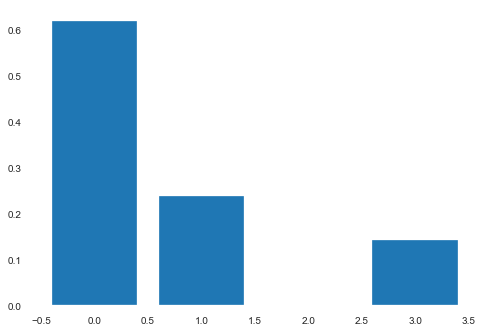

In [321]:
for i,v in enumerate(imp):
    print("feature: %0d , score: %.5f" % (i,v))
    
plt.bar([x for x in range(len(imp))], imp)
plt.show()

In [306]:
b.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')

In [322]:
b = b.drop(["Humidity","Play"],axis=1)
b

,Outlook,Temp,Windy
0,1,1,0
1,1,1,1
2,0,1,0
3,2,2,0
4,2,0,0
5,2,0,1
6,0,0,1
7,1,2,0
8,1,0,0
9,2,2,0


In [323]:
x_train,x_test,y_train,y_test = train_test_split(b,y)

In [324]:
dtc.fit(b,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [325]:
dtc_pre = dtc.predict(x_test)
dtc_pre

array([0, 1, 1, 0])

In [326]:
from sklearn.metrics import classification_report , confusion_matrix

In [327]:
cm = confusion_matrix(y_test,dtc_pre)
cm

array([[2, 0],
       [0, 2]], dtype=int64)

In [328]:
print(classification_report(y_test,dtc_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [329]:
from sklearn import tree

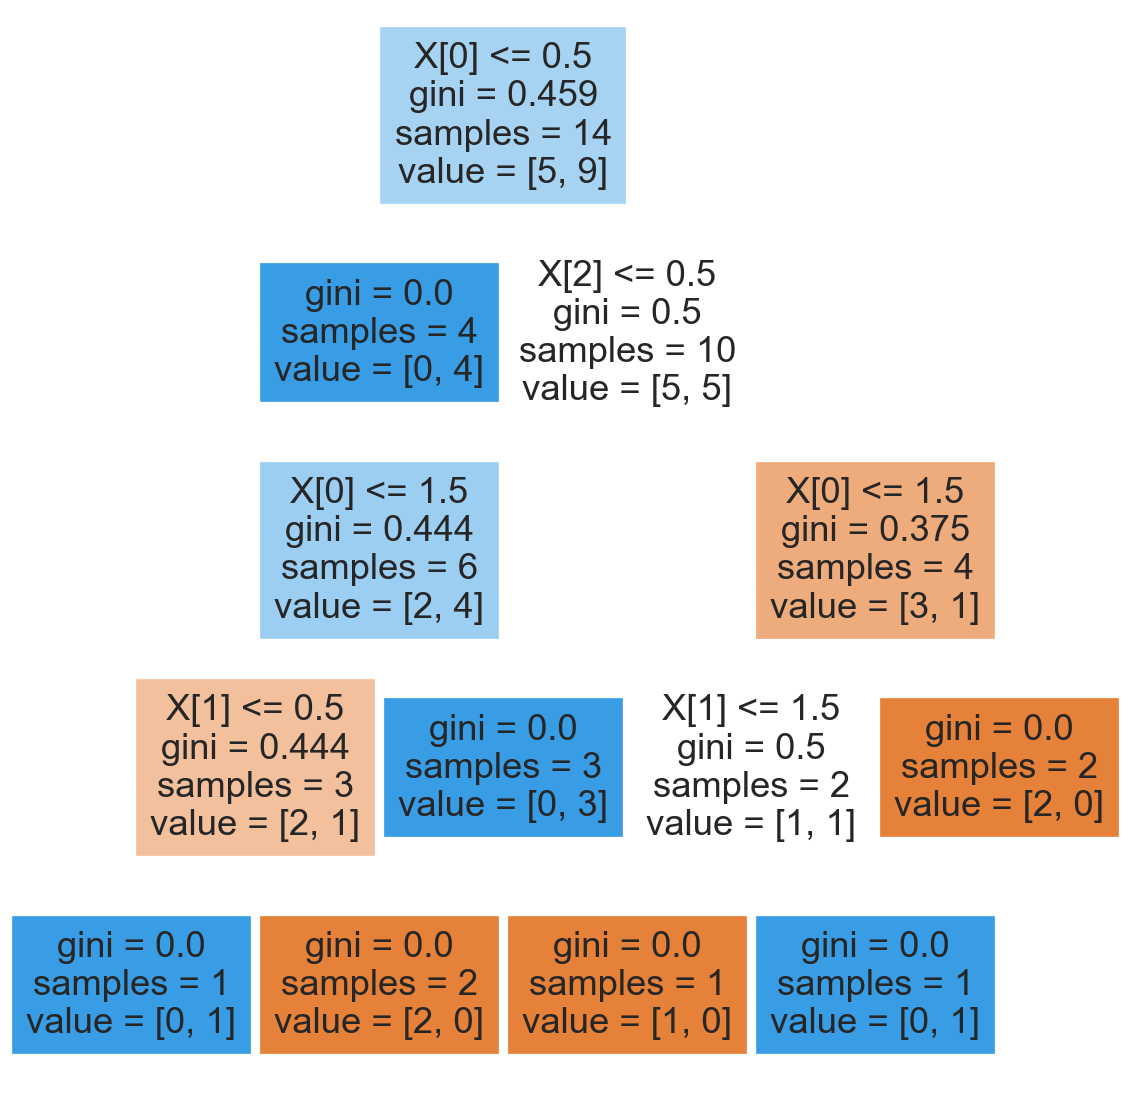

In [330]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtc,filled=True)
plt.show()

In [331]:
dtc = DecisionTreeClassifier(criterion="entropy")

In [333]:
dtc.fit(b,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [334]:
dtc_e = dtc.predict(x_test)
dtc_e

array([0, 1, 1, 0])

In [335]:
print(classification_report(y_test,dtc_e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



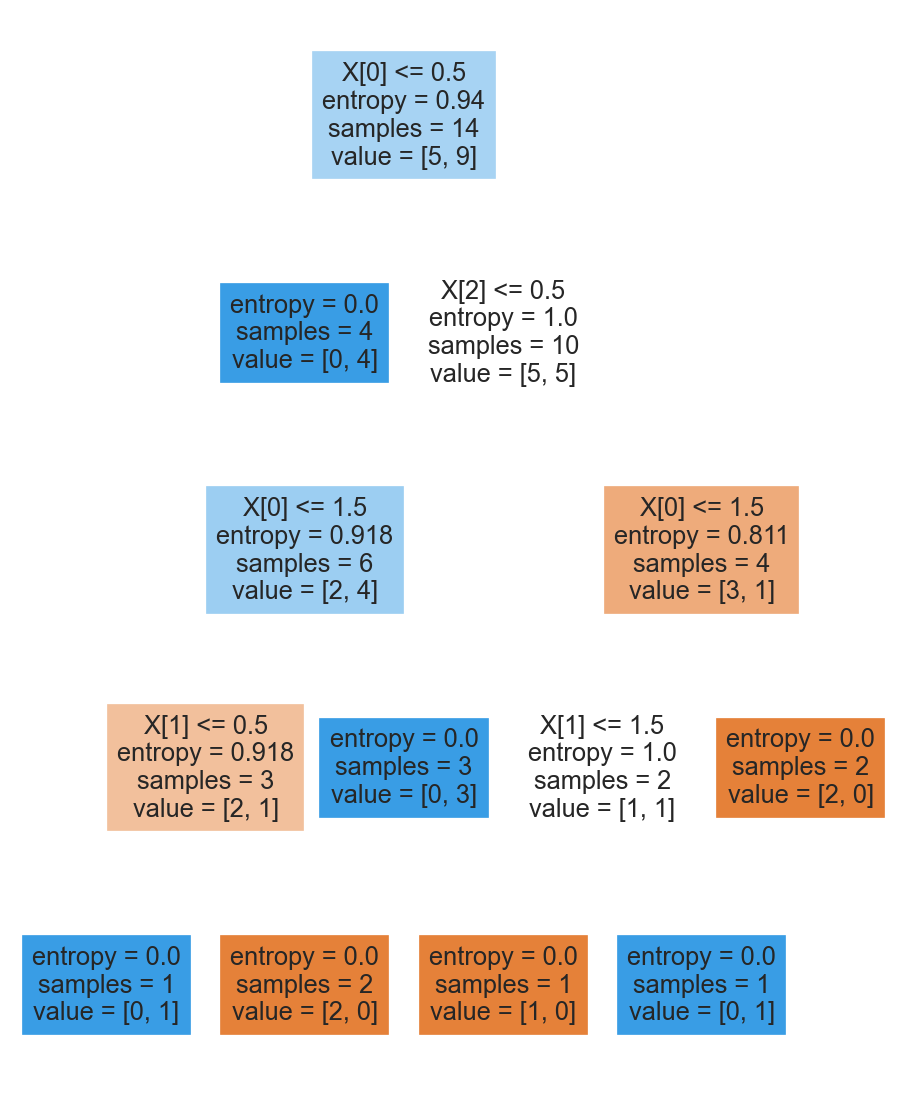

In [336]:
plt.figure(figsize=(16,20))
tree.plot_tree(dtc,filled=True)
plt.show()